# Data Analysis

## 1. Data Loading

### 1.1 LineUp Data 2022/23

Data Loading
- lineups_2022_2023_1.csv
- lineups_2022_2023_2.csv

In [1]:
import pandas as pd

# Load the datasets
lineups_1 = pd.read_csv('./data/lineups_2022_2023_1.csv')
lineups_2 = pd.read_csv('./data/lineups_2022_2023_2.csv')

lineups_1.head(), lineups_2.head()


(      Position               Player  Age Market Value            Club  \
 0   Goalkeeper   David von Ballmoos   27       €2.50m  BSC Young Boys   
 1  Centre-Back       Cédric Zesiger   24       €3.20m  BSC Young Boys   
 2  Centre-Back  Fabian Lustenberger   34        €400k  BSC Young Boys   
 3    Left-Back       Ulisses Garcia   26       €2.00m  BSC Young Boys   
 4   Right-Back           Lewin Blum   20        €750k  BSC Young Boys   
 
                                    Gameday   H/A    Status  Match ID  
 0  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  
 1  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  
 2  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  
 3  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  
 4  1. Matchday | Sat, 7/16/22   |  6:00 PM  Home  Starting   3840895  ,
              Position         Player  Age Market Value           Club  \
 0          Goalkeeper    Marwin Hitz   35     

In [2]:
# Concatenate the datasets
lineups = pd.concat([lineups_1, lineups_2], axis=0)

# safe as csv in the data folder
lineups.to_csv('./data/lineups_2022_2023_merged.csv', index=False)

lineups.sample(5)

,Position,Player,Age,Market Value,Club,Gameday,H/A,Status,Match ID
1498,midfield,Jacques Pauvert,25,NaN,FC Metz,"22. Matchday | Sun, 1/21/73 | 3:00 PM",Away,Starting,3841198
346,Centre-Forward,Mordechai Spiegler,28,NaN,Paris FC,"19. Matchday | Sun, 12/17/72 | 8:00 PM",Home,Starting,3841159
934,Goalkeeper,Amir Saipi,22,€1.20m,FC Lugano,"5. Matchday | Sun, 8/14/22 | 4:30 PM",Away,Starting,3840918
2061,Centre-Back,Jean-Pierre Betton,26,NaN,Nîmes Olympique,"11. Matchday | Tue, 10/17/72 | 8:00 PM",Home,Starting,3840952
4031,Goalkeeper,Mirko Salvi,28,€150k,FC Basel 1893,"18. Matchday | Sat, 1/28/23 | 8:30 PM",Home,Substitute,3841008


Check N/A's

In [19]:
# check for missing values
missing_values = lineups.isnull().sum()

missing_values

Position           0
Player             0
Age                0
Market Value    2779
Club               0
Gameday            0
H/A                0
Status             0
Match ID           0
dtype: int64

For the LineUp of each match in season 2022/2023 wo only have missing values in the column `Market Value`, which is not further suprising

In [20]:
# look at different values in the 'Club' column
lineups['Club'].value_counts()

Club
FC St. Gallen 1879              718
FC Basel 1893                   717
Servette FC                     717
BSC Young Boys                  716
FC Zürich                       716
FC Sion                         716
FC Winterthur                   713
Grasshopper Club Zurich         712
FC Luzern                       711
FC Lugano                       697
CF Barcelona                    176
Nîmes Olympique                 118
FC Girondins Bordeaux           117
Angers SCO                      117
Red Star FC                     117
AC Ajaccio                      116
Stade Rennais FC                116
Olympique Marseille             116
FC Sochaux-Montbéliard          116
Sporting Étoile Club Bastia     116
Paris FC                        116
AS Saint-Étienne                115
US Valenciennes-Anzin           115
CS Sedan-Ardennes               115
FC Nantes                       114
RC Strasbourg Alsace            114
Stade Reims                     113
FC Metz                

In order to only have a look at Swiss Clubs for a first step, we need to filter them.

In [9]:
# dictionary for values in 'Clubs' we want to keep
clubs_to_keep = {
    'FC St. Gallen 1879': 'FC St. Gallen 1879',
    'FC Basel 1893': 'FC Basel 1893',
    'Servette FC': 'Servette FC',
    'BSC Young Boys': 'BSC Young Boys',
    'FC Zürich': 'FC Zürich',
    'FC Sion': 'FC Sion',
    'FC Winterthur': 'FC Winterthur',
    'Grasshopper Club Zurich': 'Grasshopper Club Zurich',
    'FC Luzern': 'FC Luzern',
    'FC Lugano': 'FC Lugano'
}

# filter the dataset
lineups_SL = lineups[lineups['Club'].isin(clubs_to_keep.keys())]

print(lineups_SL['Club'].value_counts())
print("*"*50)
print("Max. Players on LineUp Sheet per Match: 20")
print("Max. Players on LineUp Sheet per Season: 20 * 36 = 720")

Club
FC St. Gallen 1879         718
FC Basel 1893              717
Servette FC                717
BSC Young Boys             716
FC Zürich                  716
FC Sion                    716
FC Winterthur              713
Grasshopper Club Zurich    712
FC Luzern                  711
FC Lugano                  697
Name: count, dtype: int64
**************************************************
Max. Players on LineUp Sheet per Match: 20
Max. Players on LineUp Sheet per Season: 20 * 36 = 720


Suprisingly, Lugano has a low number of player in the lineups of that season. After a quick look at the data, it is shown that in 17 of the 36 (i.e. ~50%!) matches Lugano had less than the maximum of 20 players on the match lineup.

In [36]:
lineups_SL.sample(10)

,Position,Player,Age,Market Value,Club,Gameday,H/A,Status,Match ID
7694,Centre-Back,Matej Maglica,24,€750k,FC St. Gallen 1879,"30. Matchday | Wed, 4/26/23 | 8:30 PM",Home,Starting,3841122
128,Left Winger,Patrick Pflücke,25,€700k,Servette FC,"1. Matchday | Sun, 7/17/22 | 4:30 PM",Home,Starting,3840898
5477,Centre-Forward,Jean-Pierre Nsame,29,€4.00m,BSC Young Boys,"21. Matchday | Sat, 2/18/23 | 8:30 PM",Home,Starting,3841057
6720,Centre-Back,Albian Hajdari,19,€400k,FC Lugano,"27. Matchday | Mon, 4/10/23 | 2:15 PM",Home,Starting,3841093
5323,Right Midfield,Darian Males,21,€3.30m,FC Basel 1893,"21. Matchday | Sun, 2/19/23 | 4:30 PM",Home,Substitute,3841053
3451,Defensive Midfield,Anto Grgic,25,€1.70m,FC Sion,"15. Matchday | Sun, 11/6/22 | 4:30 PM",Away,Starting,3840993
7292,Defensive Midfield,Jordi Quintillà,29,€1.50m,FC St. Gallen 1879,"29. Matchday | Sun, 4/23/23 | 4:30 PM",Away,Starting,3841107
127,Central Midfield,Alexis Antunes,21,€700k,Servette FC,"1. Matchday | Sun, 7/17/22 | 4:30 PM",Home,Starting,3840898
122,Centre-Back,Nicolas Vouilloz,21,€1.40m,Servette FC,"1. Matchday | Sun, 7/17/22 | 4:30 PM",Home,Starting,3840898
6436,Right-Back,Lewin Blum,21,€1.00m,BSC Young Boys,"26. Matchday | Sat, 4/1/23 | 6:00 PM",Away,Starting,3841081


### 1.2 Match Event Data 2022/23

Data Loading
- match_events_2022_2023_1.csv
- match_events_2022_2023_2.csv

In [ ]:
## TODO plausibilitätsprüfung

In [4]:
# Load the datasets
events_1 = pd.read_csv('./data/match_events_2022_2023_1.csv')
events_2 = pd.read_csv('./data/match_events_2022_2023_2.csv')

events_1.head(), events_2.head()

(             Club   H/A Timestamp         Event         Player Event  \
 0  BSC Young Boys  Home       62'          Goal  Christian Fassnacht   
 1  BSC Young Boys  Home       77'          Goal         Cedric Itten   
 2  BSC Young Boys  Home       81'          Goal        Fabian Rieder   
 3  BSC Young Boys  Home       85'          Goal       Wilfried Kanga   
 4  BSC Young Boys  Home       63'  Substitution         Cedric Itten   
 
         Remark Event        Player Assist     Player Out  Match ID  
 0             Header       Ulisses Garcia            NaN   3840895  
 1  Right-footed shot        Cheikh Niasse            NaN   3840895  
 2             Header       Wilfried Kanga            NaN   3840895  
 3  Right-footed shot  Christian Fassnacht            NaN   3840895  
 4           Tactical                  NaN  Meschack Elia   3840895  ,
             Club   H/A Timestamp         Event         Player Event  \
 0      FC Zürich  Away       90'          Goal           Roko Simi

In [5]:
# Concatenate the datasets
events = pd.concat([events_1, events_2], axis=0)

# safe as csv in the data folder
events.to_csv('./data/match_events_2022_2023_merged.csv', index=False)

events.sample(5)

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
1152,Servette FC,Away,76',Substitution,Boris Céspedes,Tactical,NaN,Dereck Kutesa,3840975
330,Stade Reims,Away,62',Goal,Georges Lech,Georges Lech,NaN,NaN,3841179
81,FC St. Gallen 1879,Home,71',Substitution,Isaac Schmidt,Tactical,NaN,Michael Kempter,3841152
2458,Stade Rennais FC,Home,11',Goal,Réginald Dortomb,Réginald Dortomb,NaN,NaN,3841090
1079,FC St. Gallen 1879,Away,83',Goal,Julian Von Moos,Left-footed shot,Ricardo Alves,NaN,3840971


Check N/A's

In [24]:
# check for missing values
missing_values_e = events.isnull().sum()

missing_values_e

Club                0
H/A                 0
Timestamp           0
Event               0
Player Event        1
Remark Event        0
Player Assist    3110
Player Out       1836
Match ID            0
dtype: int64

In [27]:
# show record with missing value in 'Player Event' column
events[events['Player Event'].isnull()]

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
1320,Elche CF,Home,54',Substitution,NaN,Injury,NaN,Chancho,3840990


The only record with a missing value regarding the Player Event can be ignored since we only focus on the Swiss Teams.

In [25]:
# look at different values in the 'Club' column
events['Club'].value_counts()


Club
BSC Young Boys                  327
FC St. Gallen 1879              327
FC Lugano                       321
Grasshopper Club Zurich         320
FC Zürich                       306
FC Sion                         302
FC Winterthur                   300
Servette FC                     297
FC Basel 1893                   296
FC Luzern                       296
CF Barcelona                     29
Olympique Marseille              28
FC Nantes                        27
AS Saint-Étienne                 25
Sporting Étoile Club Bastia      25
Nîmes Olympique                  22
OGC Nice                         22
FC Girondins Bordeaux            22
Paris FC                         20
US Valenciennes-Anzin            20
AS Nancy-Lorraine                19
CS Sedan-Ardennes                18
RC Strasbourg Alsace             18
Stade Rennais FC                 17
Stade Reims                      17
Angers SCO                       17
Olympique Lyon                   16
Red Star FC            

In [26]:
# filter the dataset
events_SL = events[events['Club'].isin(clubs_to_keep.keys())]

events_SL['Club'].value_counts()

Club
BSC Young Boys             327
FC St. Gallen 1879         327
FC Lugano                  321
Grasshopper Club Zurich    320
FC Zürich                  306
FC Sion                    302
FC Winterthur              300
Servette FC                297
FC Basel 1893              296
FC Luzern                  296
Name: count, dtype: int64

In [34]:
events_SL.sample(10)

,Club,H/A,Timestamp,Event,Player Event,Remark Event,Player Assist,Player Out,Match ID
412,FC Luzern,Home,25',Goal,Dejan Sorgic,Header,Christian Gentner,NaN,3840920
469,FC Zürich,Away,84',Substitution,Becir Omeragic,Tactical,NaN,Nikola Boranijasevic,3841197
152,FC Sion,Home,64',Substitution,Ilyas Chouaref,Tactical,NaN,Itaitinga,3840904
1448,FC St. Gallen 1879,Away,4',Yellow Card,Daouda Guindo,Handball,NaN,NaN,3840999
581,FC St. Gallen 1879,Home,54',Goal,Daouda Guindo,Left-footed shot,Christian Witzig,NaN,3840929
1560,FC St. Gallen 1879,Home,79',Substitution,Noha Ndombasi,Tactical,NaN,Chadrac Akolo,3841006
1452,FC Sion,Home,53',Yellow Card,Dimitri Cavaré,Foul,NaN,NaN,3840999
1899,FC Zürich,Home,31',Yellow Card,Fidan Aliti,Foul,NaN,NaN,3841042
292,Grasshopper Club Zurich,Away,35',Yellow Card,Dominik Schmid,Foul,NaN,NaN,3841172
1237,FC Sion,Home,71',Substitution,Kevin Bua,Tactical,NaN,Ilyas Chouaref,3840980


## 2. Determining a Stability Index (SI)

#### Definition and Rationale:
The Stability Index (SI) aims to quantify the consistency and reliability of a soccer team's lineup and performance across a season. A stable team typically exhibits fewer changes in its starting lineup, consistent performance in terms of match outcomes, and disciplined on-field behavior.

#### Criteria for Stability Index:
- **Lineup Consistency (LC)**: Measures how consistently the same players are starting matches. A lower number of different starters indicates a more stable lineup.
- **Performance Consistency (PC)**: Evaluates the consistency in match outcomes (win, draw, loss). A team that has less fluctuation in match results can be considered more stable in performance.
- **Disciplinary Record (DR)**: Assesses the number of disciplinary actions (yellow cards, red cards) a team receives. A team with fewer disciplinary actions is deemed more stable in terms of on-field behavior.

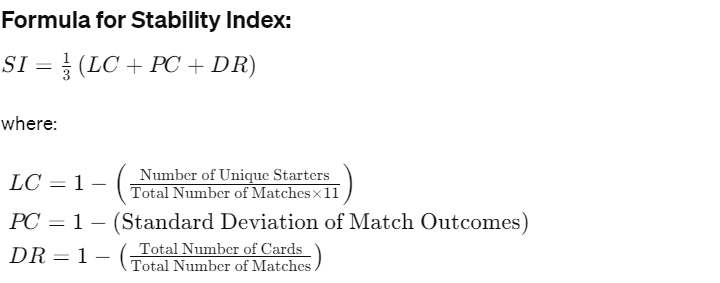

#### Assumptions:
- The maximum number of starting players in a match is 11.
- Match outcomes are quantified as 3 points for a win, 1 point for a draw, and 0 points for a loss.
- Yellow cards count as 1, red cards as 2.

#### Explanation:
- **Lineup Consistency (LC)**: We normalize the number of unique starters by the total possible number of starting positions across all matches (Total Number of Matches × 11). A team that uses all its players equally would have an LC of 0, while a team that always uses the same starting lineup would have an LC close to 1.

- **Performance Consistency (PC)**: We use the standard deviation of match outcomes to evaluate performance consistency. A lower standard deviation indicates that the team's performance (win/draw/loss) is more consistent.

- **Disciplinary Record (DR)**: This metric is normalized by the number of matches to account for teams playing different numbers of matches (due to potential match cancellations or other reasons). A DR close to 1 indicates a team has very few cards per match, reflecting a stable disciplinary record.


In [11]:
import pandas as pd
import numpy as np

# Calculate Lineup Consistency (LC)
unique_starters_per_team = lineups_SL[lineups_SL['Status'] == 'Starting'].groupby('Club')['Player'].nunique()
total_matches_per_team = lineups_SL.groupby('Club')['Match ID'].nunique()
LC = 1 - (unique_starters_per_team / (total_matches_per_team * 11))

# Show the results
LC.sort_values(ascending=False)


Club
FC St. Gallen 1879         0.936869
Grasshopper Club Zurich    0.936869
Servette FC                0.936869
FC Lugano                  0.934343
FC Winterthur              0.934343
FC Sion                    0.931818
BSC Young Boys             0.929293
FC Zürich                  0.929293
FC Basel 1893              0.926768
FC Luzern                  0.926768
dtype: float64

In [38]:
# Step 1: Count goals per match for each team
goals_per_match = events_SL[events_SL['Event'] == 'Goal'].groupby(['Match ID', 'Club']).size().reset_index(name='Goals')

# Step 2: Determine match outcomes
# First, merge this dataframe with itself on 'Match ID' to compare home vs. away goals
match_goals = pd.merge(goals_per_match, goals_per_match, on='Match ID', suffixes=('_home', '_away'))

# Ensure we're not comparing a team with itself
match_goals = match_goals[match_goals['Club_home'] != match_goals['Club_away']]

# Determine match outcomes for home team
match_goals['Home Outcome'] = np.where(match_goals['Goals_home'] > match_goals['Goals_away'], 'Win',
                                       np.where(match_goals['Goals_home'] == match_goals['Goals_away'], 'Draw', 'Loss'))

# Mapping outcomes to numerical values: Win = 3, Draw = 1, Loss = 0
outcome_to_points = {'Win': 3, 'Draw': 1, 'Loss': 0}
match_goals['Home Points'] = match_goals['Home Outcome'].map(outcome_to_points)

# Step 3: Calculate standard deviation of match outcomes
# Calculate standard deviation for each team
team_std_dev = match_goals.groupby('Club_home')['Home Points'].std()

# Normalize standard deviation scores
normalized_std_dev = (team_std_dev - team_std_dev.min()) / (team_std_dev.max() - team_std_dev.min())

# Step 4: Performance Consistency (lower standard deviation = higher consistency)
PC = 1 - normalized_std_dev

PC.sort_values(ascending=False)


Club_home
FC Winterthur              1.000000
FC Zürich                  0.541047
Servette FC                0.528231
FC St. Gallen 1879         0.409076
FC Sion                    0.228718
FC Basel 1893              0.222498
FC Lugano                  0.183757
FC Luzern                  0.175188
BSC Young Boys             0.158796
Grasshopper Club Zurich    0.000000
Name: Home Points, dtype: float64

General Interpretation:
Higher PC scores - e.g. FC Winterthur - indicate a team had a more consistent performance level throughout the season, with fewer fluctuations in match outcomes. This could be seen as a sign of stability, suggesting the team was able to perform closer to their expected level in most matches.

Lower PC scores reveal greater variability in performance, indicating a team's match outcomes were more unpredictable. This might reflect inconsistency in playing style, tactical adjustments, injuries, or other factors influencing match results.

The PC score is a reflection of how predictably a team performed in terms of match results, not necessarily their success in terms of standings or championships. It's important to consider that consistency doesn't always correlate with being the top of the league; a team could consistently win, draw, or even lose.

In [ ]:
# Adjusted Step 2: Prepare to determine match outcomes including draws without goals
# We create a list of all unique match IDs from both the events and lineups datasets
all_matches = pd.concat([lineups_SL['Match ID'], events_SL['Match ID']]).unique()

# Creating a dataframe that includes all match IDs to ensure we capture matches without goals (draws)
all_matches_df = pd.DataFrame(all_matches, columns=['Match ID'])

# Including club information for home and away teams for each match ID from the lineups dataset
# Assuming we have home and away team information in the lineups or another source
# For demonstration, let's assume lineups_SL contains a column for 'Home Team' and 'Away Team' for simplicity
# If not present, this data needs to be prepared based on match scheduling information

# Merging goals data with all matches to include matches without goals
all_match_goals = pd.merge(all_matches_df, goals_per_match, on='Match ID', how='left').fillna(0)

# Separate home and away goals into two columns in the same row for each match
# This step assumes modification or preparation to have home and away teams listed in all_match_goals or use a separate reliable source
# For simplicity, we're skipping direct implementation details of this separation

# Adjusted Step 2 continuation: Now, we directly compare home and away goals for each match in all_match_goals

# Assuming all_match_goals has been prepared with 'Home Goals' and 'Away Goals' columns
# Determine match outcomes (including draws without goals)
all_match_goals['Outcome'] = np.where(all_match_goals['Home Goals'] > all_match_goals['Away Goals'], 'Win',
                                      np.where(all_match_goals['Home Goals'] < all_match_goals['Away Goals'], 'Loss', 'Draw'))

# Convert outcomes to points for home and away separately, then combine
all_match_goals['Home Points'] = all_match_goals['Outcome'].map({'Win': 3, 'Draw': 1, 'Loss': 0})
all_match_goals['Away Points'] = all_match_goals['Outcome'].map({'Win': 0, 'Draw': 1, 'Loss': 3})

# Now, we combine the points for each team into a single column for simplified calculation
# This involves reshaping the dataframe to have one row per team per match with their points

# Step 3: Adjusted calculation of standard deviation of match outcomes
# Assuming reshaping has been done and we have a 'Team' column and a 'Points' column
team_points_std_dev = all_match_goals.groupby('Team')['Points'].std()

# Normalize standard deviation scores
normalized_std_dev = (team_points_std_dev - team_points_std_dev.min()) / (team_points_std_dev.max() - team_points_std_dev.min())

# Adjusted Step 4: Performance Consistency (lower standard deviation = higher consistency)
PC = 1 - normalized_std_dev

PC.sort_values(ascending=False)


In [39]:
# Assuming `lineups_SL` has all match IDs listed for all teams (both home and away)

# Identify all unique match IDs
all_matches = lineups_SL['Match ID'].unique()

# Create a DataFrame to track all matches and their outcomes
match_outcomes = pd.DataFrame(all_matches, columns=['Match ID'])

# Merge goals_per_match with match_outcomes to include all matches, even those without goals
match_goals_full = pd.merge(match_outcomes, goals_per_match, on='Match ID', how='left').fillna(0)

# We need to identify home and away teams for each match now
# Assuming we have a way to extract that information, possibly from lineups_SL or another source

# For demonstration, let's assume we have two additional columns in match_goals_full: 'Home Club' and 'Away Club'

# Now, calculate match outcomes considering home and away performances
match_goals_full['Outcome'] = np.select(
    [
        match_goals_full['Goals_home'] > match_goals_full['Goals_away'],
        match_goals_full['Goals_home'] < match_goals_full['Goals_away']
    ],
    ['Home Win', 'Away Win'],
    default='Draw'
)

# Assign points to each outcome for both home and away teams and calculate their standard deviations

# The implementation of calculating points and standard deviations would follow a similar logic to the initial approach,
# ensuring we calculate for both home and away games uniformly and consider all matches, including draws with no goals scored.

# The revised approach would then calculate PC with these fully considered match outcomes.


KeyError: 'Goals_home'

In [ ]:
# Calculate Disciplinary Record (DR)
# Assuming that the 'events_SL' DataFrame has a 'Card' column where yellow is 1 and red is 2
total_cards_per_team = events_SL[events_SL['Event'].isin(['Yellow Card', 'Red Card'])].groupby('Club')['Event'].count()
DR = 1 - (total_cards_per_team / total_matches_per_team)

# Calculate the Stability Index (SI)
SI = (LC + PC + DR) / 3

# Print the Stability Index for each team
SI.sort_values(ascending=False)